## Title:  The World Cinema
## Author: Christian Little
## Date: 10/3/2022

# Introduction:

The movie industry over the past 50 years has become very diverse. In this world, people think the directors, or the writers are what gives the movie life. In reality, its up to the audience that views it. Throughout the history of cinema, it has been proven that movies thrive on the simple act of feedback. Without someones opinion or perspective on the mattter, the movie is pointless. In America, we have top companies that work hard to entertain us in different ways, in which are put into genres. In a way, the genres alot of the time determines the amount of sales.

This analysis is comprised of multiple datasets revolving around the topic of movies. This dataset contains information on movies made in America but viewed internationally. Utilizing python, we will explore the dataset in an attempt to extractpolate an annalytical conclusion. The purpose of This data was to explain the key similarities and differences in how the movies performed in realation to genre. In this analysis, viewers will get the chance to dive into the complexities of what effects a movie's sales both internationally and domestically.  

# Ask:

### 1. Identify the task

Analyze Movies specifics in order to gain insight on which genres performed the best with each studio.

### 2. Questions for the analysis

-  What studio does the best with which genres?
-  What distributor makes the most money?
- Internationally and domestically, which companies gross the most in each genre category?

### Key task:

Get the top 5 companies that have the highest amount of sales

# Prepare:

This data for this analysis will come from https://www.kaggle.com/datasets/sanjeetsinghnaik/top-1000-highest-grossing-movies on Kaggle. This dataset is composed of one small csv file containing 914 rows. In this file,34 companies make up the total amount of movies put out from the 1970s to 2020. This data was brought into excel for cleaning purposes to better understand the information provided.

### Importing

In [248]:
# importing and loading libraires
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import plotly.express as px
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
import kaleido
pio.renderers
pio.renderers.default = "jupyterlab"

In [249]:
# importing dataset and renaming the csv file
hw=pd.read_csv('/Users/blisschris/Downloads/Highest Holywood Grossing Movies.csv')
hw

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [250]:
# Changed Realease Date to Datetime
hw['Release Date'] = pd.to_datetime(hw['Release Date'])

In [251]:
# Checking data types in the dataframe
hw.dtypes

Unnamed: 0                             int64
Title                                 object
Movie Info                            object
Distributor                           object
Release Date                  datetime64[ns]
Domestic Sales (in $)                  int64
International Sales (in $)             int64
World Sales (in $)                     int64
Genre                                 object
Movie Runtime                         object
License                               object
dtype: object

In [252]:
# Checking for null values. No nulls identified in required columns
hw.isna().sum()

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

# Intial Inspection process

This process is showing the highest grossing movies along with the top distributors for them

In [253]:
# Indentifying the top 10  movies for more insight on the dataset.
hw.sort_values('World Sales (in $)',ascending=False).head(10)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
7,7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13
11,11,The Lion King (2019),"After the murder of his father, a young lion p...",Walt Disney Studios Motion Pictures,2019-07-11,543638043,1119261396,1662899439,"['Adventure', 'Animation', 'Drama', 'Family', ...",1 hr 58 min,PG
5,5,Spider-Man: No Way Home (2021),"With Spider-Man's identity now revealed, Peter...",Sony Pictures Entertainment (SPE),NaT,675813257,868642706,1544455963,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 28 min,NaN
8,8,The Avengers (2012),Earth's mightiest heroes must come together an...,Walt Disney Studios Motion Pictures,2012-04-25,623357910,895457605,1518815515,"['Action', 'Adventure', 'Sci-Fi']",2 hr 23 min,PG-13
54,54,Furious 7 (2015),Deckard Shaw seeks revenge against Dominic Tor...,Universal Pictures,2015-04-01,353007020,1162334379,1515341399,"['Action', 'Thriller']",2 hr 17 min,PG-13


In [254]:
# identifying top 5 distributors by world sales 
hw.groupby((['Distributor'])).sum().sort_values(by=(['World Sales (in $)']),ascending=False).head(5)

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
Distributor,,,,
Walt Disney Studios Motion Pictures,58523,34098331657,48781958509,82372098598
Warner Bros.,71867,25891722993,37741574581,63597493931
Twentieth Century Fox,52802,19114852793,29338267462,48588894179
Universal Pictures,53205,19316009134,26232717142,45602644818
Sony Pictures Entertainment (SPE),48773,15764875138,21691612943,37456488081


In [255]:
# Identifying top distributors by volume
hw['Distributor'].value_counts()

Warner Bros.                           158
Walt Disney Studios Motion Pictures    155
Universal Pictures                     119
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      101
Paramount Pictures                      99
DreamWorks                              21
New Line Cinema                         21
Lionsgate                               19
DreamWorks Distribution                 17
Metro-Goldwyn-Mayer (MGM)               12
TriStar Pictures                         9
Miramax                                  9
Revolution Studios                       8
Columbia Pictures                        7
Dimension Films                          7
The Weinstein Company                    6
Summit Entertainment                     5
Fox Searchlight Pictures                 4
STX Entertainment                        3
Orion Pictures                           3
Screen Gems                              3
United Artists                           2
Focus Featu

In [256]:
hw['Genre'] = hw['Genre'].apply(literal_eval)

In [257]:
# Idenifying the types of genres
hw1 = hw.explode('Genre')
hw1['Genre'].value_counts()

Adventure      432
Comedy         399
Action         396
Drama          300
Thriller       230
Sci-Fi         228
Fantasy        227
Family         227
Romance        142
Animation      140
Crime          136
Mystery         87
Musical         51
Horror          45
Biography       39
Music           33
Sport           28
War             27
History         22
Western         14
Documentary      2
Name: Genre, dtype: int64

# Analyze:

This analysis is showing the top five distributors by the highest world sales.

In [258]:
Top_10DM = hw.groupby((['Distributor', 'Title'])).sum().sort_values(by=(['Distributor', 'Title', 'World Sales (in $)',]) , ascending=False).reset_index()

In [259]:
 sony_pictures= Top_10DM.loc[Top_10DM['Distributor'] == 'Sony Pictures Entertainment (SPE)'].sort_values(by='World Sales (in $)', ascending=False).head(10)

In [260]:
sony_pictures.head(10)

,Distributor,Title,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
605,Sony Pictures Entertainment (SPE),Spider-Man: No Way Home (2021),5,675813257,868642706,1544455963
608,Sony Pictures Entertainment (SPE),Spider-Man: Far from Home (2019),40,390532085,741395911,1131927996
614,Sony Pictures Entertainment (SPE),Skyfall (2012),86,304360277,804209222,1108569499
633,Sony Pictures Entertainment (SPE),Jumanji: Welcome to the Jungle (2017),36,404540171,558002774,962542945
609,Sony Pictures Entertainment (SPE),Spider-Man 3 (2007),60,336530303,558453070,894983373
612,Sony Pictures Entertainment (SPE),Spectre (2015),217,200074609,680606910,880681519
607,Sony Pictures Entertainment (SPE),Spider-Man: Homecoming (2017),64,334201140,545965784,880166924
577,Sony Pictures Entertainment (SPE),Venom (2018),189,213515506,642569645,856085151
611,Sony Pictures Entertainment (SPE),Spider-Man (2002),35,407022860,418002176,825025036
634,Sony Pictures Entertainment (SPE),Jumanji: The Next Level (2019),73,320314960,479744747,800059707


In [261]:
 universal_pictures= Top_10DM.loc[Top_10DM['Distributor'] == 'Universal Pictures'].sort_values(by='World Sales (in $)', ascending=False).head(10)

This table shows the top 10 movies for Sony pictures. Spider-man no way home leads as the highest grossing movie for the company. However, the sales internationally beats domestic sales by a good margin.

In [262]:
universal_pictures.head(10)

,Distributor,Title,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
379,Universal Pictures,Jurassic World (2015),7,652385625,1018130819,1670516444
398,Universal Pictures,Furious 7 (2015),54,353007020,1162334379,1515341399
378,Universal Pictures,Jurassic World: Fallen Kingdom (2018),29,417719760,892746536,1310466296
332,Universal Pictures,The Fate of the Furious (2017),163,226008385,1009996733,1236005118
365,Universal Pictures,Minions (2015),61,336045770,823398892,1159444662
411,Universal Pictures,Despicable Me 3 (2017),113,264624300,770175831,1034800131
381,Universal Pictures,Jurassic Park (1993),37,404214720,629713583,1033928303
412,Universal Pictures,Despicable Me 2 (2013),49,368065385,602700620,970766005
321,Universal Pictures,The Secret Life of Pets (2016),48,368384330,507074301,875458631
409,Universal Pictures,E.T. the Extra-Terrestrial (1982),23,435110554,304203888,792910554


This table shows the top 10 movies for Universal pictures. The highest grossing movie for this company is Jurassic world. The sales internationally were Significantly higher than domestic sales.

In [263]:
walt_disney = Top_10DM.loc[Top_10DM['Distributor'] == 'Walt Disney Studios Motion Pictures'].sort_values(by='World Sales (in $)', ascending=False).head(10)

In [264]:
walt_disney.head(10)

,Distributor,Title,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
301,Walt Disney Studios Motion Pictures,Avengers: Endgame (2019),1,858373000,1939128328,2797501328
205,Walt Disney Studios Motion Pictures,Star Wars: Episode VII - The Force Awakens (2015),0,936662225,1132859475,2069521700
300,Walt Disney Studios Motion Pictures,Avengers: Infinity War (2018),4,678815482,1369544272,2048359754
187,Walt Disney Studios Motion Pictures,The Lion King (2019),11,543638043,1119261396,1662899439
199,Walt Disney Studios Motion Pictures,The Avengers (2012),8,623357910,895457605,1518815515
259,Walt Disney Studios Motion Pictures,Frozen II (2019),17,477373578,972653355,1450026933
302,Walt Disney Studios Motion Pictures,Avengers: Age of Ultron (2015),20,459005868,943803672,1402809540
294,Walt Disney Studios Motion Pictures,Black Panther (2018),3,700426566,647171407,1347597973
204,Walt Disney Studios Motion Pictures,Star Wars: Episode VIII - The Last Jedi (2017),9,620181382,712517448,1332698830
260,Walt Disney Studios Motion Pictures,Frozen (2013),39,400953009,880555091,1281508100


This table shows the top 10 movies for Walt Disney. Avengers endgame leads as the highest grossing movie for this company. International sales doubles the amount in domestic sales. This shows that the movie had an outstanding response from the public.

In [265]:
warner_bros = Top_10DM.loc[Top_10DM['Distributor'] == 'Warner Bros.'].sort_values(by='World Sales (in $)', ascending=False).head(10)

In [266]:
warner_bros.head(10)

,Distributor,Title,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
108,Warner Bros.,Harry Potter and the Deathly Hallows: Part 2 (...,42,381409310,960912354,1342321665
146,Warner Bros.,Aquaman (2018),63,335061807,813424079,1148485886
40,Warner Bros.,The Dark Knight Rises (2012),21,448139099,633003513,1081142612
95,Warner Bros.,Joker (2019),62,335451311,738968073,1074419384
31,Warner Bros.,The Hobbit: An Unexpected Journey (2012),87,303003568,714000000,1017003568
103,Warner Bros.,Harry Potter and the Sorcerer's Stone (2001),76,318087620,698725454,1016813075
41,Warner Bros.,The Dark Knight (2008),12,534858444,471115201,1005973645
109,Warner Bros.,Harry Potter and the Deathly Hallows: Part 1 (...,91,296347721,680695761,977043483
30,Warner Bros.,The Hobbit: The Battle of the Five Armies (2014),125,255119788,707063077,962182865
29,Warner Bros.,The Hobbit: The Desolation of Smaug (2013),120,258366855,700640658,959007513


This table shows the top 10 movies for Warner Bros. Harry Potter and the Deathly Hallows: Part 2 was the highest grossing movie for this company. This movie also doubles its sales Internationally over domestically.

In [267]:
Twentieth_fox = Top_10DM.loc[Top_10DM['Distributor'] == 'Twentieth Century Fox'].sort_values(by='World Sales (in $)', ascending=False).head(10)

In [268]:
Twentieth_fox.head(10)

,Distributor,Title,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
545,Twentieth Century Fox,Avatar (2009),2,760507625,2086738578,2847246203
475,Twentieth Century Fox,Star Wars: Episode I - The Phantom Menace (1999),18,474544677,552538030,1027082707
543,Twentieth Century Fox,Bohemian Rhapsody (2018),180,216668042,694141269,910809311
511,Twentieth Century Fox,Ice Age: Dawn of the Dinosaurs (2009),222,196573705,690113112,886686817
512,Twentieth Century Fox,Ice Age: Continental Drift (2012),330,161321843,715922939,877244782
473,Twentieth Century Fox,Star Wars: Episode III - Revenge of the Sith (...,44,380270577,488119983,868390560
509,Twentieth Century Fox,Independence Day (1996),84,306169268,511231623,817400891
534,Twentieth Century Fox,Deadpool 2 (2018),71,324591735,461304874,785896609
535,Twentieth Century Fox,Deadpool (2016),51,363070709,419766082,782836791
472,Twentieth Century Fox,Star Wars: Episode IV - A New Hope (1977),19,460998507,195751992,775398007


This table shows the top 10 movies for Twentieth Century Fox. The highest grossing movie for this company is Avatar. This is known as the highest grossing movie of all time with over two billion dollars in world sales.

In [269]:
def top_10_mov(company):
    Top_M = hw1.groupby((['Distributor', 'Title','Genre'])).sum().sort_values(by=(['Distributor', 'Title', 'World Sales (in $)',]) , ascending=False).reset_index()
    df = Top_M.loc[Top_M['Distributor'] == company].sort_values(by='World Sales (in $)', ascending=False)
    df = df.explode('Genre')
    df = df.groupby((['Distributor','Genre'])).sum().sort_values(by=(['World Sales (in $)']) , ascending=False).reset_index()
    #hw['Genre'] = hw['Genre'].apply(literal_eval)
    #df = df.groupby((['Distributor','Genre'])).count().sort_values(by=([ 'Unnamed: 0']) , ascending=False)#.reset_index()
    df = df.drop(labels='Unnamed: 0', axis=1)
    fig = px.bar(df, x='Genre', y='World Sales (in $)',color="Genre",title=f'Top Grossing Genres For {company}',)
    fig.show() 
    return df.head(10)

# Share:

These bar charts show the most popular genres in each company

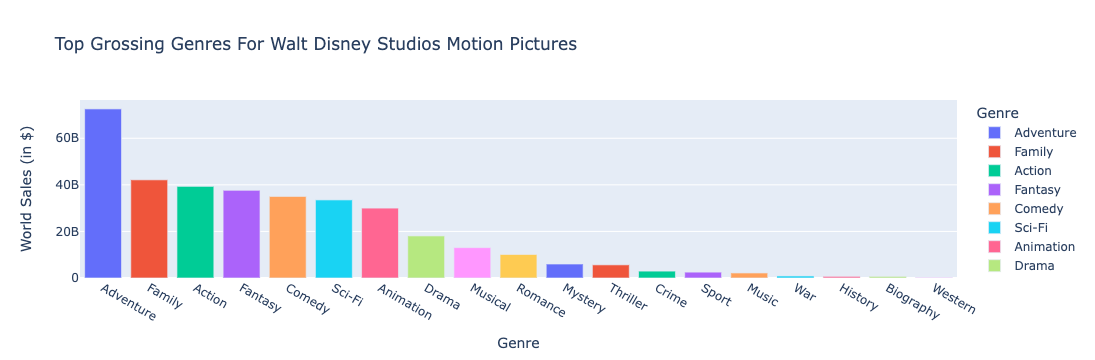

,Distributor,Genre,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,Walt Disney Studios Motion Pictures,Adventure,28804920117,44068246361,72600836341
1,Walt Disney Studios Motion Pictures,Family,17471027199,25099156773,42150029087
2,Walt Disney Studios Motion Pictures,Action,15683711814,23663948573,39347660387
3,Walt Disney Studios Motion Pictures,Fantasy,14988858191,22930274144,37666758410
4,Walt Disney Studios Motion Pictures,Comedy,15131260884,20061953867,35025433791
5,Walt Disney Studios Motion Pictures,Sci-Fi,13762787013,19769105419,33531892432
6,Walt Disney Studios Motion Pictures,Animation,12088864355,18181047798,30017538228
7,Walt Disney Studios Motion Pictures,Drama,7742295362,10584126071,18070603790
8,Walt Disney Studios Motion Pictures,Musical,5101470134,8193529184,13042625393
9,Walt Disney Studios Motion Pictures,Romance,4462959799,5816966163,10114956688


In [270]:
top_10_mov('Walt Disney Studios Motion Pictures')


### Notes:

The top genre for Walt Disney is Adventure with over 70 billion in sales alone. This chart shows a signifacnt difference with the other genres.

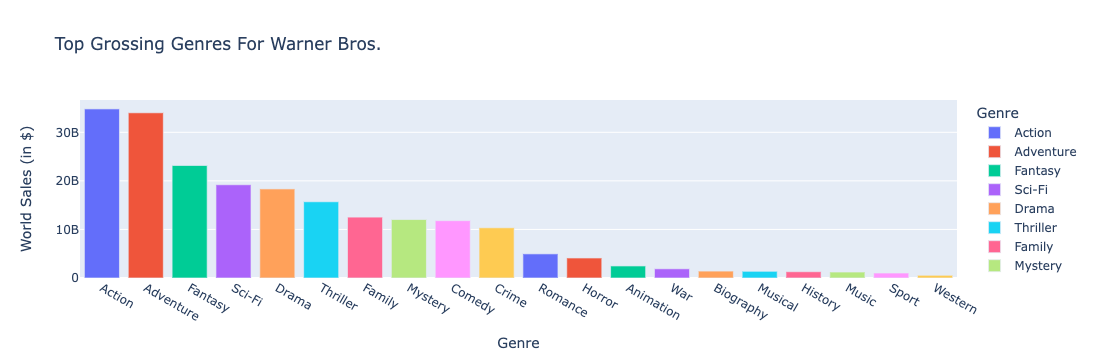

,Distributor,Genre,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,Warner Bros.,Action,14069931227,20855484516,34817230039
1,Warner Bros.,Adventure,12526900228,21600336212,34019050742
2,Warner Bros.,Fantasy,8138807601,15028816828,23167624437
3,Warner Bros.,Sci-Fi,7272229157,12037758345,19201801796
4,Warner Bros.,Drama,8451758652,9892268544,18344027196
5,Warner Bros.,Thriller,6591942546,9108051060,15699993606
6,Warner Bros.,Family,4577459801,7963578599,12541038407
7,Warner Bros.,Mystery,4300619513,7739993162,12040612682
8,Warner Bros.,Comedy,5852563585,5953665647,11806229232
9,Warner Bros.,Crime,4911560899,5432723510,10344284409


In [271]:
top_10_mov('Warner Bros.')

### Notes:

The top genre for Warner bros would be Action with over 34 billion in sales. In this chart you can see that Adventure competes closely with action for the top spot.

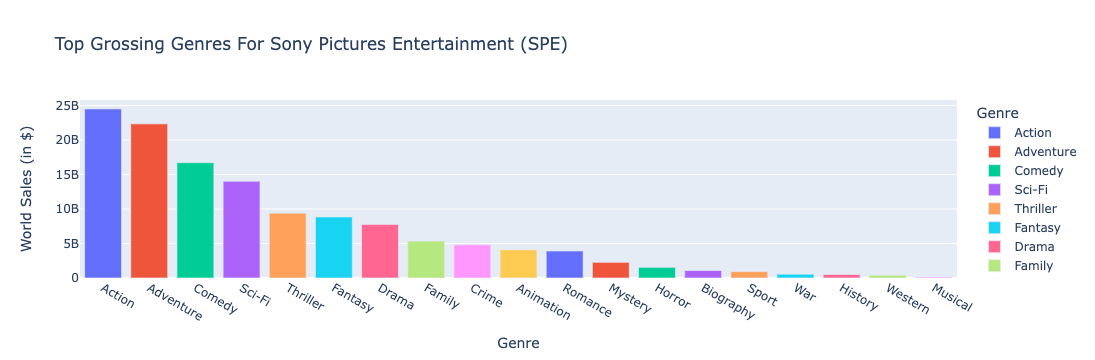

,Distributor,Genre,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,Sony Pictures Entertainment (SPE),Action,9640973223,14865788171,24506761394
1,Sony Pictures Entertainment (SPE),Adventure,8267811461,14076510298,22344321759
2,Sony Pictures Entertainment (SPE),Comedy,7848143409,8862630271,16710773680
3,Sony Pictures Entertainment (SPE),Sci-Fi,5412200769,8613713091,14025913860
4,Sony Pictures Entertainment (SPE),Thriller,3525316991,5869744611,9395061602
5,Sony Pictures Entertainment (SPE),Fantasy,3681013419,5166309268,8847322687
6,Sony Pictures Entertainment (SPE),Drama,3763774265,4004166944,7767941209
7,Sony Pictures Entertainment (SPE),Family,2186735254,3166589411,5353324665
8,Sony Pictures Entertainment (SPE),Crime,2518547465,2290966674,4809514139
9,Sony Pictures Entertainment (SPE),Animation,1554685732,2527206232,4081891964


In [272]:
top_10_mov('Sony Pictures Entertainment (SPE)')

### Notes:

The Action genre for Sony pictures has the highest grossing sales with over 24 billion. The Action genre combats for the top spot but is shy of about 2 billion.

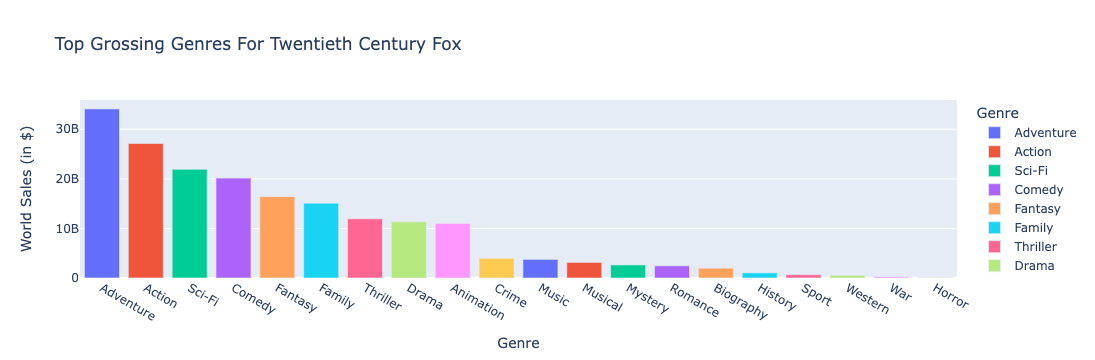

,Distributor,Genre,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,Twentieth Century Fox,Adventure,12535097960,21358992028,34111463912
1,Twentieth Century Fox,Action,10642500697,16282724428,27142599049
2,Twentieth Century Fox,Sci-Fi,8606353676,13119995969,21943723569
3,Twentieth Century Fox,Comedy,8093189226,12153836463,20165425689
4,Twentieth Century Fox,Fantasy,6523325746,9668664356,16409364026
5,Twentieth Century Fox,Family,5679983772,9410768925,15090752697
6,Twentieth Century Fox,Thriller,4406972354,7541840783,11948813137
7,Twentieth Century Fox,Drama,4545699870,6872723007,11336822877
8,Twentieth Century Fox,Animation,3740876115,7272870009,11013746124
9,Twentieth Century Fox,Crime,1717659520,2266125155,3983784675


In [273]:
top_10_mov('Twentieth Century Fox')

### Notes:

The Adventure genre has the highest grossing sales for Twentieth Century Fox. The runner up would be action just shy of 7 billion dollars.

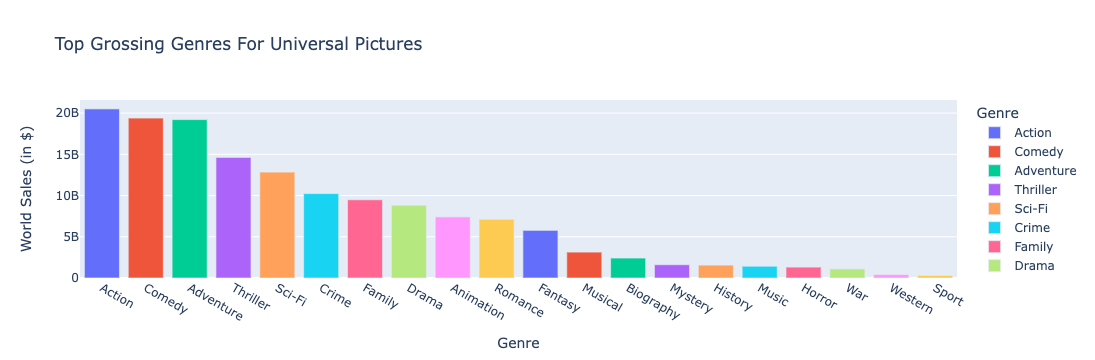

,Distributor,Genre,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,Universal Pictures,Action,7636419201,12868795186,20505214387
1,Universal Pictures,Comedy,8979274834,10417608806,19396883640
2,Universal Pictures,Adventure,7731122633,11423472003,19208513178
3,Universal Pictures,Thriller,5474565341,9150842462,14625407803
4,Universal Pictures,Sci-Fi,4993037130,7797646119,12844279361
5,Universal Pictures,Crime,3761380636,6476572818,10237953454
6,Universal Pictures,Family,4010553890,5422559420,9486709422
7,Universal Pictures,Drama,4035448355,4792292013,8828062798
8,Universal Pictures,Animation,2882507346,4527757823,7410265169
9,Universal Pictures,Romance,3087167877,4035669308,7122837185


In [274]:
top_10_mov('Universal Pictures')

## Notes:

The action genre for Universal pictures grosses the highest in sale. However, Comedy and Adventure comes  extremly close to fight for the number one spot.

# Conclusion:

In conclusion, this data shows that people enjoy the action genre over anything. The top three genres collectively would be Action, Adventure, and Comedy. Analyzing this data tells me that Walt Disney had the largest impact in sales over the course of 50 years. The top Genre overall for this company would be Adventure. People tend to gravitate towards stories with conquests and explorations of a protagonist. In this analysis, we determined what studio grossed the highest.

In genreal, we can assess that Adventure movies consistanly outperforms all other genres at the box office. one could also derive from the conclusion that genres Inevitably effect its sales performance. We could also asses that each studio has varied succes with each genre.

# Work cited:

https://www.kaggle.com/datasets/sanjeetsinghnaik/top-1000-highest-grossing-movies

https://www.imdb.com/

https://thewaltdisneycompany.com/

https://www.sonypictures.com/

https://www.universalpictures.com/

https://www.20thcenturystudios.com/

https://www.warnerbros.com/